In [1]:
import pandas as pd
import numpy as np

In [2]:
path='/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_QC/annotated_hg37/'
def get_df(chr_num):
    chrx=pd.read_csv(path+"chr"+str(chr_num)+"__check.txt",sep = ' ', names=['Correct','Count','Chr'])
    correct_index = chrx[chrx.Chr.isna()].index
    correct = chrx.iloc[correct_index,:2]
    correct.set_axis(['Count', 'Chr'], axis='columns', inplace=True)
    chr_new = chrx.iloc[:,1:3].dropna().append(correct.reset_index(drop=True))
    chr_new = chr_new[chr_new['Chr'] != '#CHROM']
    
    chr_new['Count'] = pd.to_numeric(chr_new['Count'])  # Convert to numeric data type
    #sorted_df = df.sort_values(by='count')
    chr_new["file"] = "chr"+str(chr_num) 
    
    return chr_new.sort_values(by='Count',  ascending=False)

In [19]:
df = pd.DataFrame()
for chromosome in range(1, 22):
    df = df.append(get_df(chromosome))

In [4]:
df

,Count,Chr,file
0,27469972.0,chr1,chr1
11,54332.0,chr1_gl000192_random,chr1
12,16526.0,chr2,chr1
18,3793.0,chr5,chr1
22,1679.0,chr9,chr1
...,...,...,...
30,78.0,chrUn_gl000215,chr21
15,65.0,chr22,chr21
28,54.0,chrUn_gl000212,chr21
29,36.0,chrUn_gl000213,chr21


In [20]:
pivot = df.pivot_table(
    index = 'file',
    columns='Chr',
    values='Count'
)

In [17]:
pivot

Chr,chr1,chr10,chr11,chr11_gl000202_random,chr12,chr13,chr14,chr15,chr16,chr17,...,chrUn_gl000228,chrUn_gl000231,chrUn_gl000232,chrUn_gl000234,chrUn_gl000235,chrUn_gl000236,chrUn_gl000241,chrUn_gl000246,chrX,chrY
file,,,,,,,,,,,,,,,,,,,,,
chr1,27469972.0,323.0,432.0,NaN,246.0,33.0,71.0,553.0,1422.0,225.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,676.0,30.0
chr10,1050.0,16286160.0,502.0,NaN,273.0,75.0,101.0,418.0,294.0,74.0,...,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,930.0,93.0
chr11,565.0,51.0,16584098.0,2326.0,13.0,8.0,NaN,14.0,33.0,140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.0,NaN
chr12,187.0,122.0,179.0,NaN,16006052.0,31.0,9.0,2.0,8.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0,13.0
chr13,63.0,NaN,44.0,NaN,NaN,11761714.0,NaN,NaN,1082.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,18.0
chr14,37.0,24.0,NaN,NaN,5.0,NaN,11022797.0,5.0,96.0,1.0,...,NaN,NaN,NaN,874.0,NaN,NaN,NaN,NaN,6.0,NaN
chr15,57.0,59.0,68.0,NaN,245.0,30.0,15.0,10286564.0,111.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.0,141.0
chr16,1910.0,862.0,65.0,NaN,317.0,61.0,108.0,697.0,10973861.0,227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,92.0
chr17,608.0,485.0,6095.0,NaN,360.0,91.0,73.0,72.0,859.0,9745810.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337.0,161.0


In [38]:
# Filter columns based on the custom function
#filtered_pivot = pivot.filter(lambda col: '_' not in col, axis=1)
filtered_pivot = pivot.filter(regex='^[^_]*$', axis=1)



In [44]:
#filtered_pivot.sort_index().index
chr_names = filtered_pivot.sort_index().index

def sorting_key(chromosome):
    return int(chromosome[3:])

# Sort chromosome names using the sorting key
sorted_chromosomes = sorted(chr_names, key=sorting_key)
filtered_pivot = filtered_pivot.reindex(sorted_chromosomes)

In [51]:
filtered_pivot

Chr,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,...,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chrX,chrY
file,,,,,,,,,,,,,,,,,,,,,
chr1,27469972.0,323.0,432.0,246.0,33.0,71.0,553.0,1422.0,225.0,76.0,...,32.0,635.0,766.0,3793.0,317.0,551.0,208.0,1679.0,676.0,30.0
chr2,1177.0,155.0,44.0,72.0,13.0,222.0,835.0,1684.0,15.0,23.0,...,464.0,141.0,15.0,72.0,66.0,107.0,69.0,13960.0,76.0,85.0
chr3,468.0,360.0,462.0,257.0,102.0,419.0,40.0,18.0,76.0,143.0,...,317.0,24287158.0,400.0,487.0,378.0,309.0,705.0,564.0,494.0,167.0
chr4,NaN,1271.0,33.0,21.0,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,6.0,23595155.0,4.0,NaN,13.0,NaN,NaN,22.0,10.0
chr5,684.0,NaN,1.0,NaN,NaN,NaN,NaN,14.0,10.0,29.0,...,NaN,3.0,123.0,22096038.0,32.0,NaN,65.0,17.0,469.0,NaN
chr6,172.0,397.0,287.0,448.0,166.0,249.0,100.0,62.0,39.0,66.0,...,NaN,288.0,428.0,2492.0,20567511.0,218.0,406.0,159.0,623.0,381.0
chr7,1023.0,269.0,203.0,182.0,289.0,48.0,529.0,4101.0,245.0,468.0,...,144.0,218.0,277.0,213.0,416.0,19635764.0,133.0,883.0,238.0,33.0
chr8,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,18831225.0,13.0,NaN,NaN
chr9,778.0,591.0,1830.0,170.0,194.0,173.0,156.0,19.0,70.0,870.0,...,226.0,152.0,283.0,72.0,661.0,188.0,118.0,15423595.0,200.0,39.0


In [77]:
sorted_chromosomes.append("chrX")
sorted_chromosomes.append("chrY")
filtered_pivot = filtered_pivot.reindex(columns=sorted_chromosomes)

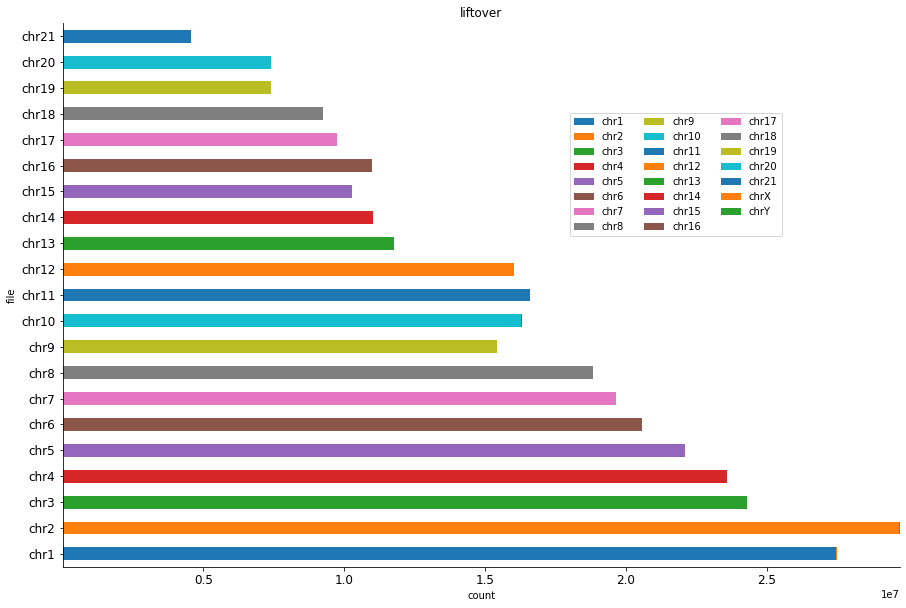

In [106]:
#from matplotlib import ticker
#import matplotlib.pyplot as plt

ax = filtered_pivot.plot(kind='barh', stacked=True, title='liftover', figsize=(15, 10))
ax.legend(ncol=3,fancybox=True,bbox_to_anchor=(0.6, 0.6), loc='lower left')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("count")
for spine in ['top', 'right']:
     ax.spines[spine].set_visible(False)

In [107]:
pd.set_option('display.max_columns', None)
filtered_pivot

Chr,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chrX,chrY
file,,,,,,,,,,,,,,,,,,,,,,,
chr1,27469972.0,16526.0,635.0,766.0,3793.0,317.0,551.0,208.0,1679.0,323.0,432.0,246.0,33.0,71.0,553.0,1422.0,225.0,76.0,1130.0,181.0,188.0,676.0,30.0
chr2,1177.0,29698106.0,141.0,15.0,72.0,66.0,107.0,69.0,13960.0,155.0,44.0,72.0,13.0,222.0,835.0,1684.0,15.0,23.0,10.0,122.0,143.0,76.0,85.0
chr3,468.0,335.0,24287158.0,400.0,487.0,378.0,309.0,705.0,564.0,360.0,462.0,257.0,102.0,419.0,40.0,18.0,76.0,143.0,47.0,256.0,340.0,494.0,167.0
chr4,NaN,1.0,6.0,23595155.0,4.0,NaN,13.0,NaN,NaN,1271.0,33.0,21.0,NaN,NaN,NaN,NaN,NaN,20.0,22.0,NaN,NaN,22.0,10.0
chr5,684.0,19.0,3.0,123.0,22096038.0,32.0,NaN,65.0,17.0,NaN,1.0,NaN,NaN,NaN,NaN,14.0,10.0,29.0,12974.0,NaN,NaN,469.0,NaN
chr6,172.0,313.0,288.0,428.0,2492.0,20567511.0,218.0,406.0,159.0,397.0,287.0,448.0,166.0,249.0,100.0,62.0,39.0,66.0,40.0,130.0,41.0,623.0,381.0
chr7,1023.0,964.0,218.0,277.0,213.0,416.0,19635764.0,133.0,883.0,269.0,203.0,182.0,289.0,48.0,529.0,4101.0,245.0,468.0,11.0,41.0,325.0,238.0,33.0
chr8,35.0,NaN,NaN,3.0,NaN,NaN,NaN,18831225.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr9,778.0,1112.0,152.0,283.0,72.0,661.0,188.0,118.0,15423595.0,591.0,1830.0,170.0,194.0,173.0,156.0,19.0,70.0,870.0,27.0,24.0,331.0,200.0,39.0


In [84]:
sorted_chromosomes = sorted(chr_names, key=sorting_key)
pivot = pivot.reindex(sorted_chromosomes)

In [90]:
pivot["Percentage"] = pivot.max(axis=1)*100/pivot.sum(axis=1)


In [99]:
pivot["Percentage"]

file
chr1     99.693490
chr2     99.932775
chr3     99.970401
chr4     99.985376
chr5     99.855509
chr6     99.963300
chr7     99.942719
chr8     99.994626
chr9     98.623096
chr10    99.924097
chr11    99.973608
chr12    99.953795
chr13    99.276040
chr14    99.979211
chr15    99.980153
chr16    99.850286
chr17    99.776681
chr18    99.981065
chr19    99.994673
chr20    99.376183
chr21    98.608932
Name: Percentage, dtype: float64